In [1]:
pm="PRINOM"
pm

'PRINOM'

In [2]:
import pandas as pd

file_path = "/kaggle/input/capstone-app/Apps.csv"

# Try different encodings
data = pd.read_csv(file_path, encoding="ISO-8859-1")  # or try encoding="latin1"
print(data.head(30))


                                                 Link Ground_truth
0         http://dbpedia.org/resource/Albert_Einstein    Scientist
1            http://dbpedia.org/resource/Isaac_Newton    Scientist
2          http://dbpedia.org/resource/Charles_Darwin    Scientist
3            http://dbpedia.org/resource/Nikola_Tesla    Scientist
4            http://dbpedia.org/resource/Ada_Lovelace    Scientist
5             http://dbpedia.org/resource/Marie_Curie    Scientist
6         http://dbpedia.org/resource/Richard_Feynman    Scientist
7       http://dbpedia.org/resource/Leonardo_da_Vinci    Scientist
8              http://dbpedia.org/resource/Niels_Bohr    Scientist
9         http://dbpedia.org/resource/Michael_Faraday    Scientist
10     http://dbpedia.org/resource/Chanchal_Chowdhury        Actor
11           http://dbpedia.org/resource/Ananta_Jalil        Actor
12            http://dbpedia.org/resource/Zahid_Hasan        Actor
13        http://dbpedia.org/resource/Mosharraf_Karim        A

In [3]:
data = data[['Link']]
data = data.drop_duplicates()
data

,Link
0,http://dbpedia.org/resource/Albert_Einstein
1,http://dbpedia.org/resource/Isaac_Newton
2,http://dbpedia.org/resource/Charles_Darwin
3,http://dbpedia.org/resource/Nikola_Tesla
4,http://dbpedia.org/resource/Ada_Lovelace
5,http://dbpedia.org/resource/Marie_Curie
6,http://dbpedia.org/resource/Richard_Feynman
7,http://dbpedia.org/resource/Leonardo_da_Vinci
8,http://dbpedia.org/resource/Niels_Bohr
9,http://dbpedia.org/resource/Michael_Faraday


In [4]:
entities = [entity for entity in data["Link"]]
entities

['http://dbpedia.org/resource/Albert_Einstein',
 'http://dbpedia.org/resource/Isaac_Newton',
 'http://dbpedia.org/resource/Charles_Darwin',
 'http://dbpedia.org/resource/Nikola_Tesla',
 'http://dbpedia.org/resource/Ada_Lovelace',
 'http://dbpedia.org/resource/Marie_Curie',
 'http://dbpedia.org/resource/Richard_Feynman',
 'http://dbpedia.org/resource/Leonardo_da_Vinci',
 'http://dbpedia.org/resource/Niels_Bohr',
 'http://dbpedia.org/resource/Michael_Faraday',
 'http://dbpedia.org/resource/Chanchal_Chowdhury',
 'http://dbpedia.org/resource/Ananta_Jalil',
 'http://dbpedia.org/resource/Zahid_Hasan',
 'http://dbpedia.org/resource/Mosharraf_Karim',
 'http://dbpedia.org/resource/Mamunur_Rashid',
 'http://dbpedia.org/resource/Saleh_Ahmed',
 'http://dbpedia.org/resource/Riaz_(actor)',
 'http://dbpedia.org/resource/Ferdous_Ahmed',
 'http://dbpedia.org/resource/Aly_Zaker',
 'http://dbpedia.org/resource/Lutfur_Rahman_George',
 'http://dbpedia.org/resource/Lionel_Messi',
 'http://dbpedia.org/resour

In [5]:
!pip install sentence-transformers


In [6]:
import pandas as pd
import requests
import numpy as np
from sentence_transformers import SentenceTransformer

In [9]:
pip install wikipedia-api


Note: you may need to restart the kernel to use updated packages.


In [10]:
import wikipediaapi

# ✅ Wikipedia API সেটআপ (সঠিকভাবে User-Agent সংযোজন)
user_agent = "MyEntitySearchApp/1.0 (contact@mydomain.com)"  # তোমার অ্যাপের নাম ও ইমেইল ব্যবহার করো
wiki_wiki = wikipediaapi.Wikipedia(user_agent=user_agent, language="en")  # ✅ সঠিকভাবে User-Agent যুক্ত করা হলো

# ✅ Wikipedia থেকে ডেটা ফেচ করার ফাংশন
def fetch_wikipedia_summary(entity):
    page = wiki_wiki.page(entity.split("/")[-1])  # DBpedia লিঙ্ক থেকে Wikipedia পেজের নাম বের করবে
    if page.exists():
        return f"{page.title}. {page.summary[:500]}"  # প্রথম 500 ক্যারেক্টার নেওয়া হচ্ছে
    return ""

# ✅ Wikipedia থেকে টেক্সট ফেচ
entity_texts = [fetch_wikipedia_summary(entity) for entity in entities]

# ✅ প্রিন্ট করে দেখা
for text in entity_texts[:5]:  
    print(text, "\n")


Albert Einstein. Albert Einstein (, EYEN-styne; German: [ˈalbɛʁt ˈʔaɪnʃtaɪn] ; 14 March 1879 – 18 April 1955) was a German-born theoretical physicist who is best known for developing the theory of relativity. Einstein also made important contributions to quantum mechanics. His mass–energy equivalence formula E = mc2, which arises from special relativity, has been called "the world's most famous equation". He received the 1921 Nobel Prize in Physics for his services to theoretical physics, and especially for his  

Isaac Newton. Sir Isaac Newton (; 4 January [O.S. 25 December] 1643 – 31 March [O.S. 20 March] 1727) was an English polymath active as a mathematician, physicist, astronomer, alchemist, theologian, and author. Newton was a key figure in the Scientific Revolution and the Enlightenment that followed. His book Philosophiæ Naturalis Principia Mathematica (Mathematical Principles of Natural Philosophy), first published in 1687, achieved the first great unification in physics and e

In [11]:
import pandas as pd
import wikipediaapi
import numpy as np
import requests
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

In [12]:
for entity in entities:
    entity_texts.append(fetch_wikipedia_summary(entity))
    time.sleep(1)  # Delay to avoid hitting request limits

In [13]:
# ✅ Load Sentence-BERT Model
bert_model = SentenceTransformer("sentence-transformers/all-MiniLM-L6-v2")

# ✅ Generate BERT Embeddings
embeddings = bert_model.encode(entity_texts, convert_to_numpy=True)

# ✅ Save Embeddings (Optional)
np.save("bert_embeddings.npy", embeddings)

# ✅ Print shape of embeddings
print("Embeddings shape:", embeddings.shape)
print("Sample embedding:", embeddings[0])


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Embeddings shape: (60, 384)
Sample embedding: [-2.82730851e-02  2.80548688e-02 -1.42467748e-02  1.20042652e-01
  6.73821708e-03  2.04383042e-02  2.54764799e-02  8.19626153e-02
  9.58165061e-03 -9.40418430e-03  5.24812564e-02 -3.01753338e-02
 -9.15794149e-02  7.65461549e-02 -9.47280321e-03  2.34451313e-02
 -1.54709602e-02  9.08765793e-02 -8.11670646e-02 -1.15411147e-01
 -4.39840257e-02 -5.71596175e-02  2.47061569e-02 -8.96003917e-02
  4.20447811e-02  4.03460898e-02  4.90996912e-02 -3.78324874e-02
  9.67280008e-03  4.37783115e-02  5.79901114e-02 -8.63951221e-02
 -2.10350938e-03 -4.99166660e-02 -3.42478510e-04 -1.64394118e-02
 -2.75818240e-02 -9.26500838e-03  2.52183210e-02 -5.06591722e-02
 -7.41278827e-02  6.96041621e-03  1.74290519e-02  5.48509471e-02
  5.58486134e-02 -3.46183255e-02  8.05529356e-02 -1.52625777e-02
 -4.95472290e-02  7.05442438e-03 -9.86119732e-04 -7.55922170e-03
 -3.58713269e-02 -3.66172530e-02  1.49160475e-01  4.44939733e-02
  2.69422214e-02 -1.25574088e-02  1.71622317

In [14]:
embeddings

array([[-0.02827309,  0.02805487, -0.01424677, ...,  0.00234801,
        -0.00617739,  0.00055847],
       [-0.02061989, -0.03656455, -0.00859391, ..., -0.01395057,
         0.00645364, -0.024005  ],
       [-0.06112501,  0.02121046,  0.02693327, ...,  0.01144494,
         0.02705102,  0.01582088],
       ...,
       [ 0.01473173, -0.06407789, -0.10019612, ...,  0.02410831,
         0.04808912,  0.00564125],
       [-0.04666366,  0.02054472, -0.06808855, ...,  0.04226818,
         0.03245673, -0.04036723],
       [-0.0265353 ,  0.09130753, -0.03420624, ..., -0.00068278,
        -0.02304487,  0.02507707]], dtype=float32)

In [15]:
import numpy as np

# Save embeddings to a file
np.save("/kaggle/working/bert_embeddings.npy", embeddings)


# Cluster

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

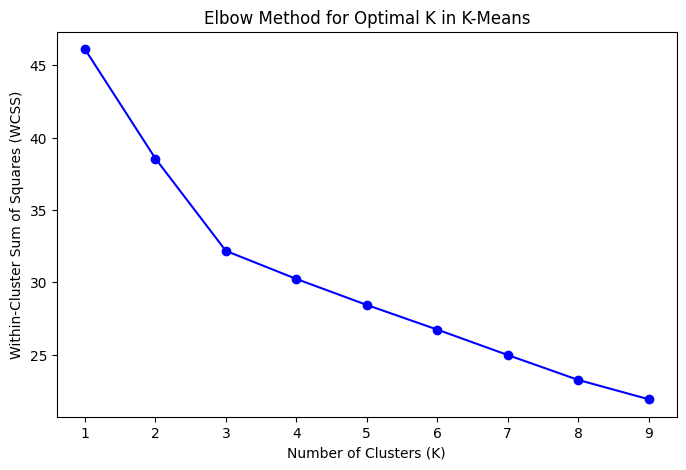

In [17]:
# Calculate WCSS for a range of K values to use the Elbow Method
wcss = []
k_range = range(1, 10)  # Range of K values from 1 to 10

# Iterate through each k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(embeddings)
    wcss.append(kmeans.inertia_)  # Inertia is the WCSS

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.title("Elbow Method for Optimal K in K-Means")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.xticks(k_range)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


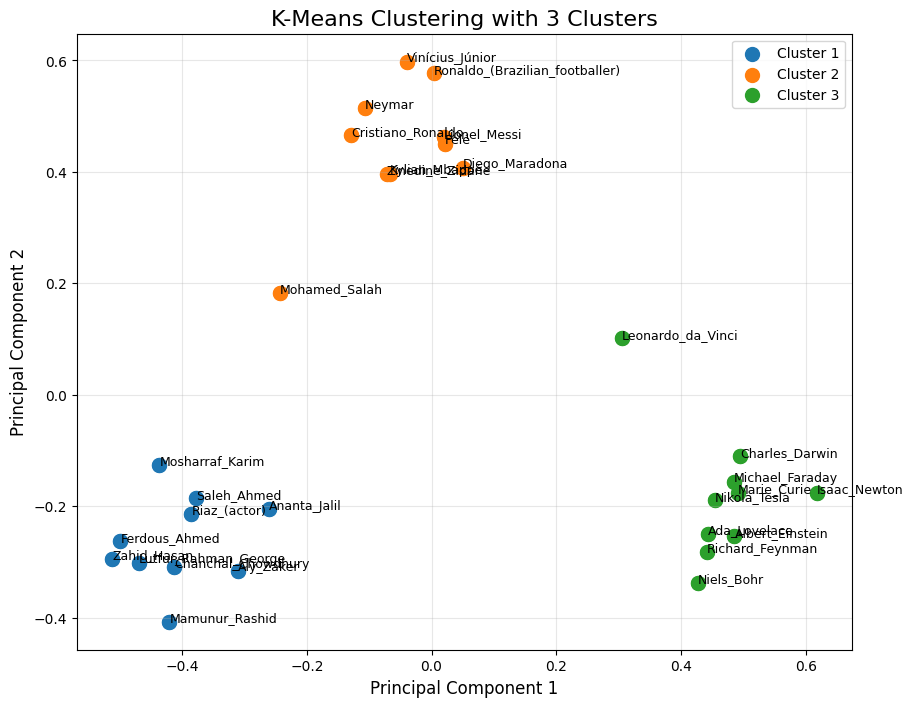

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'embeddings' is a numpy array or list of vectors
# Step 1: Convert embeddings to a numpy array (if not already)
embeddings_array = np.array(embeddings)

# Step 2: Set the number of clusters (e.g., based on the Elbow Method)
optimal_clusters = 3

# Step 3: Apply K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(embeddings_array)

# Step 4: Get cluster labels for each embedding
cluster_labels = kmeans.labels_

# Step 5: Visualize Clusters in 2D using PCA
from sklearn.decomposition import PCA

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings_array)

# Plot the clustered data
plt.figure(figsize=(10, 8))
for cluster in range(optimal_clusters):
    cluster_points = embeddings_2d[cluster_labels == cluster]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster + 1}", s=100)

# Annotate points with entity names
for i, entity in enumerate(entities):
    plt.text(embeddings_2d[i, 0], embeddings_2d[i, 1], entity.split("/")[-1], fontsize=9)

# Add labels and title
plt.title(f"K-Means Clustering with {optimal_clusters} Clusters", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [19]:
# Dictionary to store entities for each cluster
cluster_entities = {f"Cluster_{i+1}": [] for i in range(optimal_clusters)}

# Distribute entities into their respective clusters
for entity, label in zip(entities, kmeans.labels_):
    cluster_entities[f"Cluster_{label+1}"].append(entity)

# Display the number of entities in each cluster
for cluster, entities_list in cluster_entities.items():
    print(f"Number of entities in {cluster}: {len(entities_list)}")

# Save entities for each cluster in text files
for cluster, entities_list in cluster_entities.items():
    file_name = f"{cluster.lower()}_entities.txt"
    with open(file_name, "w") as file:
        file.write("\n".join(entities_list))

# Print all cluster entities
for cluster, entities_list in cluster_entities.items():
    print(f"\n{cluster} Entities:")
    print(entities_list)


Number of entities in Cluster_1: 10
Number of entities in Cluster_2: 10
Number of entities in Cluster_3: 10

Cluster_1 Entities:
['http://dbpedia.org/resource/Chanchal_Chowdhury', 'http://dbpedia.org/resource/Ananta_Jalil', 'http://dbpedia.org/resource/Zahid_Hasan', 'http://dbpedia.org/resource/Mosharraf_Karim', 'http://dbpedia.org/resource/Mamunur_Rashid', 'http://dbpedia.org/resource/Saleh_Ahmed', 'http://dbpedia.org/resource/Riaz_(actor)', 'http://dbpedia.org/resource/Ferdous_Ahmed', 'http://dbpedia.org/resource/Aly_Zaker', 'http://dbpedia.org/resource/Lutfur_Rahman_George']

Cluster_2 Entities:
['http://dbpedia.org/resource/Lionel_Messi', 'http://dbpedia.org/resource/Pelé', 'http://dbpedia.org/resource/Neymar', 'http://dbpedia.org/resource/Cristiano_Ronaldo', 'http://dbpedia.org/resource/Diego_Maradona', 'http://dbpedia.org/resource/Vinícius_Júnior', 'http://dbpedia.org/resource/Kylian_Mbappé', 'http://dbpedia.org/resource/Ronaldo_(Brazilian_footballer)', 'http://dbpedia.org/resour

In [20]:
import json

# Create a dictionary to store clusters
cluster_dict = {f"Cluster_{i+1}": [] for i in range(optimal_clusters)}

# Assign entities to their respective clusters
for entity, label in zip(entities, cluster_labels):
    cluster_dict[f"Cluster_{label+1}"].append(entity.split("/")[-1])  # Store only entity names

# Save the clusters dictionary as a JSON file
clusters_file = "/kaggle/working/clusters.json"
with open(clusters_file, "w") as f:
    json.dump(cluster_dict, f, indent=4)

print("Clusters saved successfully!")


Clusters saved successfully!
